In [164]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

In [165]:
pd.set_option('display.max_columns', None)

In [166]:
trees = pd.read_csv('C:\\Temp\\MRes\\training_data\\AB_3cat.csv')

In [77]:
# def prepare_xy(file):
#     trees = pd.read_csv(file)
#     trees = trees.drop(columns=['geometry'])
#     trees = trees.to_numpy()
#     X, y = trees[:,1:], trees[:,0]
#     X = X.astype('float32')
#     y = y.astype('str')
#     y = LabelEncoder().fit_transform(y)
#     return(X, y)

In [167]:
trees.head()

GENUS  All.returns.above.2  All.returns.above.mean  All.returns.above.mode  \
0  Tilia                 1920                     827                     942   
1   Acer                 1015                     572                     798   
2   Acer                  366                     202                     189   
3   Acer                  177                     126                      96   
4   Acer                 1028                     476                     735   

   Canopy.relief.ratio  First.returns.above.2  First.returns.above.mean  \
0             0.329585                   1416                       723   
1             0.556663                    708                       527   
2             0.440053                    337                       199   
3             0.802231                    142                       124   
4             0.470105                    833                       440   

   First.returns.above.mode  H01TH  H05TH  H10TH  H15TH  H20TH  H25TH  H30TH  \
0                       811   5.04   5.18   5.33   5.45   5.62   5.75   5.88   
1                       244   5.06   5.34   5.65   6.16   6.70   7.15   7.57   
2                       187   5.05   5.18   5.26   5.35   5.49   5.62   5.69   
3                        79   6.05   7.56  10.16  11.30  11.95  12.09  12.29   
4                       615   5.09   5.23   5.45   5.63   5.86   6.06   6.20   

   H35TH  H40TH  H45TH  H50TH  H55TH  H60TH  H65TH  H70TH  H75TH  H80TH  \
0   6.01   6.13   6.24   6.33   6.43   6.55   6.70   6.91   7.14   7.63   
1   7.95   8.42   9.15   9.59  10.04  10.25  10.43  10.69  10.90  11.36   
2   5.79   5.97   6.15   6.21   6.28   6.33   6.40   6.48   6.56   6.76   
3  12.52  12.62  12.71  12.84  12.89  12.94  12.98  13.05  13.12  13.21   
4   6.33   6.45   6.60   6.73   6.93   7.22   7.44   7.66   7.81   8.05   

   H90TH  H95TH  H99TH    HCV  HKUR   HMAX  HMEADIAN  HMEAN  HMODE   HSD  \
0   7.91   8.10   8.71  14.31  2.47   9.49      6.33   6.48   6.34  0.93   
1  11.48  11.63  11.96  23.84  1.77  12.20      9.59   9.01  10.90  2.15   
2   6.91   7.02   7.31   9.77  1.98   7.53      6.21   6.11   6.19  0.60   
3  13.31  13.38  13.71  13.65  7.95  13.74     12.84  12.20  12.89  1.67   
4   8.24   8.46   8.79  15.01  1.85   8.96      6.73   6.86   6.16  1.03   

   HSKE  HVAR   I01TH   I05TH   I10TH    I15TH   I20TH   I25TH   I30TH  \
0  0.51  0.86  488.38   689.8   920.6  1076.70  1279.0  1446.0  1622.4   
1 -0.39  4.61  453.00   517.0   620.6   808.20  1050.8  1462.5  2222.2   
2 -0.05  0.36  615.30  1255.0  1680.0  2468.00  3191.0  3687.0  4109.0   
3 -2.34  2.77  483.76   658.4  1315.0  1622.60  2280.2  3000.0  3809.2   
4  0.04  1.06  539.00   785.4  1127.4  1510.35  2142.4  2799.0  3320.9   

     I35TH   I40TH   I45TH   I50TH   I55TH   I60TH    ICV  IKUR   IMAX  \
0  1828.00  2019.0  2187.0  2396.0  2594.9  2845.8  57.01  2.96   8143   
1  3103.00  3745.0  4342.3  4888.0  5400.2  5907.4  62.31  1.67  10579   
2  4408.25  4700.0  4954.5  5196.0  5527.0  5852.0  45.95  2.23  10346   
3  4389.60  4794.2  5206.2  5568.0  5878.2  6266.0  48.64  2.00   9915   
4  3683.85  4060.2  4513.3  4733.0  4975.0  5271.6  48.81  2.12  10206   

   IMEADIAN    IMEAN  IMODE     IP65    IP70     IP75    IP80    IP90  \
0    2396.0  2670.93    879  3064.40  3321.5  3622.75  4373.3  4933.4   
1    4888.0  4533.38    444  6305.30  6624.6  6900.50  7711.5  8054.4   
2    5196.0  5328.16   4331  6300.25  6722.0  7164.50  8163.5  8880.0   
3    5568.0  5062.11   1228  6551.00  6797.0  7054.00  7679.2  7880.8   
4    4733.0  4454.68   4733  5569.85  5862.6  6121.50  6782.1  7135.3   

      IP95      IP99      ISD  ISKE        IVAR  \
0  5497.20   6831.53  1522.59  0.73  2318274.94   
1  8659.20   9642.54  2824.58 -0.06  7978231.46   
2  9305.50  10190.25  2448.45  0.00  5994906.73   
3  8214.60   9003.28  2462.13 -0.41  6062069.68   
4  7631.45   8745.74  2174.35 -0.18  4727797.24   

   Percentage.all.returns.above.mean  Pe

In [168]:
trees = trees.drop(columns=['geometry'])

In [161]:
#trees = trees.to_numpy()

In [169]:
X, y = trees.iloc[:,1:], trees.iloc[:,0].values

In [146]:
X = X.astype('float32')
y = y.astype('str')

In [43]:
# y = LabelEncoder().fit_transform(y)

In [112]:
# Evaluate naive

# Instantiate a DummyClassifier with 'most_frequent' strategy
naive = DummyClassifier(strategy='most_frequent')

# Create RepeatedStratifiedKFold cross-validator with 10 folds, 3 repeats and a seed of 1.
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state=1)

# Calculate accuracy using `cross_val_score()` with model instantiated, data to fit, target variable, 'accuracy' scoring, cross validator, n_jobs=-1, and error_score set to 'raise'
n_scores = cross_val_score(naive, X, y, scoring='accuracy', cv=cv, n_jobs=1, error_score='raise')

# Print mean and standard deviation of n_scores: 
print('Naive score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Naive score: 0.333 (0.000)


In [147]:
# Evaluate baseline model

# Instantiate a DecisionTreeClassifier
model = DecisionTreeClassifier()

# Calculate accuracy using `cross_val_score()` with model instantiated, data to fit, target variable, 'accuracy' scoring, cross validator 'cv', and error_score set to 'raise'
m_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, error_score='raise')

# Print mean and standard deviation of m_scores: 
print('Baseline score: %.3f (%.3f)' % (mean(m_scores), std(m_scores)))

Baseline score: 0.630 (0.064)


In [172]:
# Import several other classifiers for ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [199]:
cv = RepeatedStratifiedKFold(n_splits= 10, n_repeats=5, random_state= 1)

clf = RandomForestClassifier()
clf2 = SVC(gamma = 0.1)
clf3 = AdaBoostClassifier()

clf_scores = cross_val_score(clf, X, y, scoring='accuracy', error_score='raise', cv = cv)
clf_scores2 = cross_val_score(clf2, X, y, scoring='accuracy', error_score='raise', cv = cv)
clf_scores3 = cross_val_score(clf3, X, y, scoring='accuracy', error_score='raise', cv = cv)

print('Baseline score: %.3f (%.3f)' % (mean(clf_scores), std(clf_scores)))
print('Baseline score: %.3f (%.3f)' % (mean(clf_scores2), std(clf_scores2)))
print('Baseline score: %.3f (%.3f)' % (mean(clf_scores3), std(clf_scores3)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Baseline score: 0.730 (0.056)
Baseline score: 0.502 (0.004)
Baseline score: 0.677 (0.064)


In [181]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(clf, X, y, cv=10)
conf_mat_rf = confusion_matrix(y, y_pred)

y_pred = cross_val_predict(clf2, X, y, cv=10)
conf_mat_svm = confusion_matrix(y, y_pred)

y_pred = cross_val_predict(clf3, X, y, cv=10)
conf_mat_ada = confusion_matrix(y, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [196]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    
    plt.savefig('C:\\Temp\\MRes\\Figures\\cm_svm_ab_3cat.eps')
    
    plt.show()
    

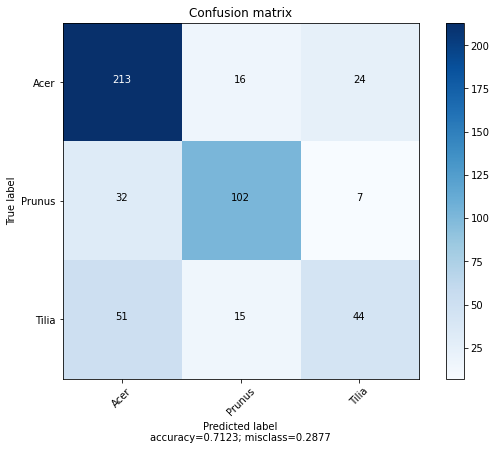

<Figure size 432x288 with 0 Axes>

In [182]:
plot_confusion_matrix(conf_mat_rf, normalize = False, target_names = ['Acer', 'Prunus', 'Tilia'])
plt.savefig('C:\\Temp\\MRes\\Figures\\cm_rf_ab_3cat.eps')

<IPython.core.display.Javascript object>


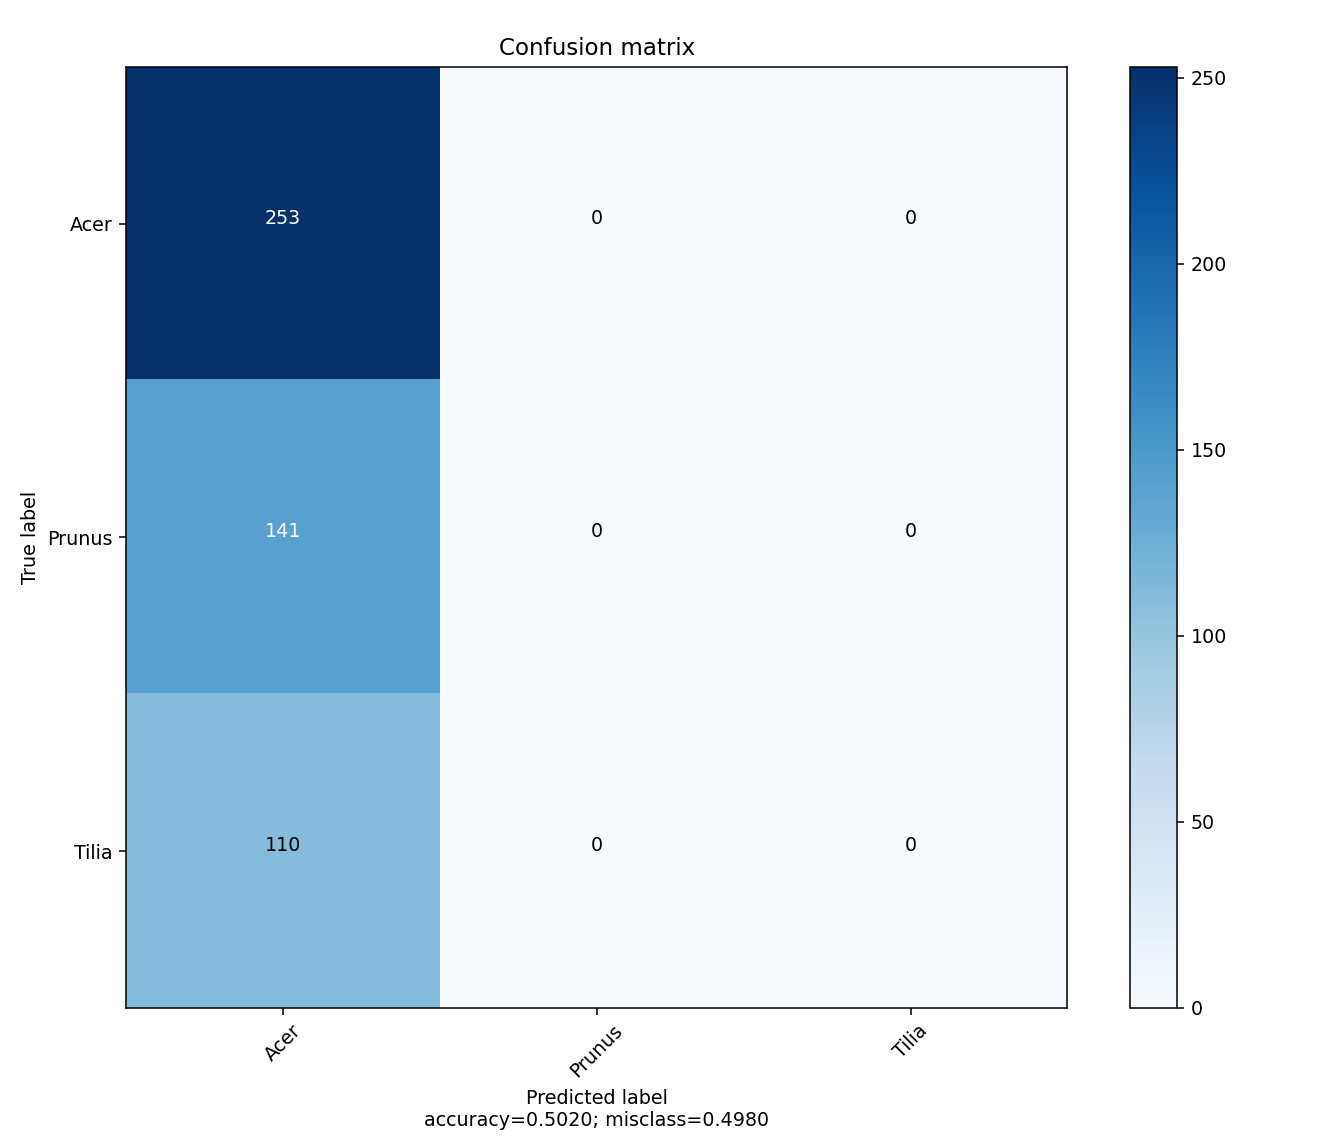

In [197]:
plot_confusion_matrix(conf_mat_svm, normalize = False, target_names = ['Acer', 'Prunus', 'Tilia'])
#plt.savefig('C:\\Temp\\MRes\\Figures\\cm_svm_ab_3cat.eps')

<IPython.core.display.Javascript object>


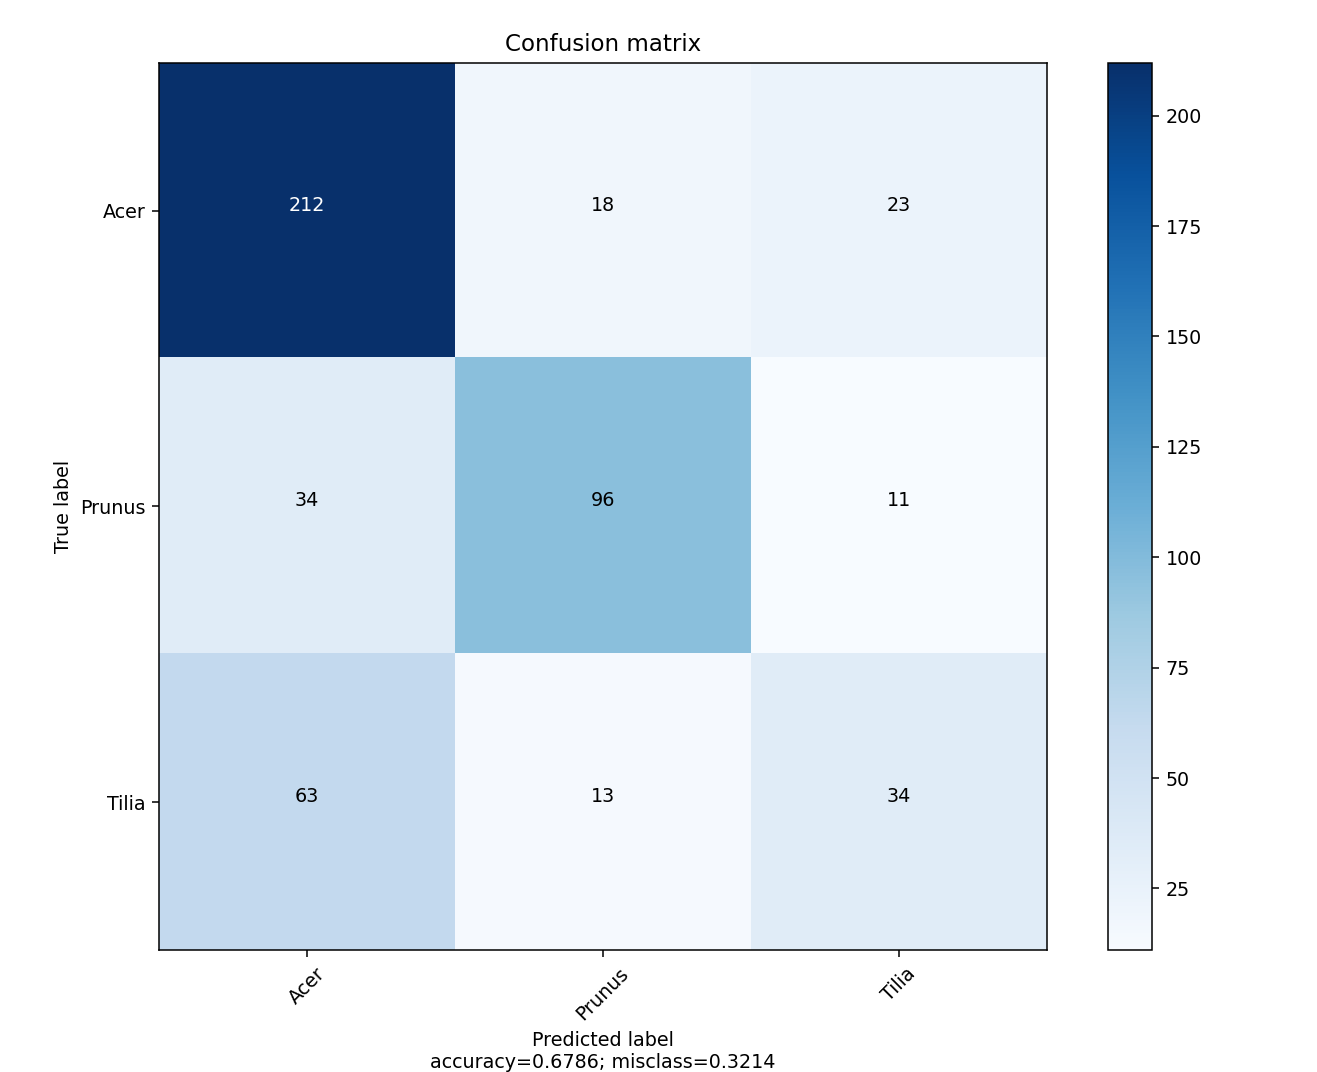

In [198]:
%matplotlib notebook
plot_confusion_matrix(conf_mat_ada, normalize = False, target_names = ['Acer', 'Prunus', 'Tilia'])
#plt.savefig('C:\\Temp\\MRes\\Figures\\cm_ada_ab_3cat.png')

In [188]:
from sklearn.model_selection import cross_validate

clf=RandomForestClassifier(n_estimators =10, random_state = 42, class_weight="balanced")
output = cross_validate(clf, X, y, cv=cv, scoring = 'accuracy', return_estimator =True)

In [191]:
for idx,estimator in enumerate(output['estimator']):
    print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = X.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances)

Features sorted by their score for estimator 0:
                          importance
ISD                         0.079368
IVAR                        0.057862
IP95                        0.052890
I55TH                       0.029212
ISKE                        0.028621
...                              ...
First.returns.above.mean    0.000733
Return.6.count.2            0.000723
I20TH                       0.000542
Return.5.count.2            0.000125
Return.7.count.above.2      0.000000

[92 rows x 1 columns]
Features sorted by their score for estimator 1:
                        importance
ISD                       0.094510
IP95                      0.059378
IVAR                      0.052717
ISKE                      0.051841
I55TH                     0.033876
...                            ...
Return.1.count.above.2    0.000989
IP75                      0.000723
Return.6.count.2          0.000000
HMEAN                     0.000000
Return.7.count.above.2    0.000000

[92 rows x 1 col

In [ ]:
feature_names = X.columns.values.tolist()
importances = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
importances - importances.tolist()
print(importances)